<a href="https://colab.research.google.com/github/LaFra99/Images-Classification---AlexNet/blob/main/AlexNet_Dataset_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASL  FINGERSPELLING IMAGES (RGB and Depth Images)

**Project of Francesca Mori**

 **Student_ID: 5114382**

Links of reference:

- Kaggle page of reference: https://www.kaggle.com/datasets/mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

- Page where to find the dataset: https://empslocal.ex.ac.uk/people/staff/np331/index.php?section=FingerSpellingDataset

**An important note about the choice of dataset**:

On this page https://empslocal.ex.ac.uk/people/staff/np331/index.php?section=FingerSpellingDataset there are two kind of datasets:
- Dataset A with 5 users
- Dataset B with 9 users

Initially, I've started my project by using Dataset B with 9 users; however, after many tries I've faced a problem properly related to the kind of data.
The data in this dataset are only of Depth type, but the biggest problem was about the quality of those data that was very low to the point that it was difficult to recognise whats in the images also through the human eye .

For this reason I decided to approach Dataset A, with five users, that contains RGB images of a better quality and to proceed by developing the current project on it.

**Dataset Introduction:**

Dataset A contains cropped RGB images representing the ASL (American Sign Language) handshapes corresponding to 24* letters of the English Alphabet.

Images belong to 5 different non-native signers, so the dataset is composed of five folders representing the five signers and for each user-folder there is a complex of sub-folders divided per letter.
* **Note**: letters 'J' and 'Z' were excluded from this dataset since their representation is related to a movement, and so not capturable in a picture.
* **Note**: 'G' handshape representation is incorrect in terms of ASL correctness.

So, in terms of data:

The dataset is composed of:
- 5 folders representing 5 signers
- for each signer-folder there are 24 sub-folders representing the static signs *(the number 24 is explained by the exclusion of letters 'j' and 'z')
- total number of files: 131.668 files

**Better to use the full dataset or a sufficient sample?**
- In the beginning, I've extrapolated a uniformly and randomly distributed sample from the dataset; however, the accuracy of my model even by modifying many parameters and models as well didn't reach the sufficiency.

So,  after many tries, I've decided to consider the whole dataset to see if there would have been any difference in terms of datas learning.

As expected, by considering a larger size of data, the model started performing better and this is why I decided to proceed considering all the data I had.

# Initial reading and analysis of data:

- Required packages and libraries:

In [ ]:
!pip install torch torchvision
!pip install d2l==1.0.0a1.post0
import torch
from torchvision import transforms, datasets
from torch.utils import data
from d2l import torch as d2l
import numpy as np
import matplotlib.pyplot as plt
d2l.use_svg_display()
%matplotlib inline
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 668 kB/s 
     |████████████████████████████████| 121 kB 26.0 MB/s 
     |████████████████████████████████| 1.6 MB 27.3 MB/s 
     |████████████████████████████████| 83 kB 2.6 MB/s 


- Opening of the dataset imported on google drive in zip format:

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dataset_5.zip', 'r') as zipObj:
    zipObj.extractall()

Use of OS Module:
- through the use of os.mkdir() method, I've created two directories setting two empty 'train' and 'test' paths.

In [ ]:
import os
import shutil

os.mkdir('/content/dataset5/train')
os.mkdir('/content/dataset5/test')

- Creating a set of folders, one per letter, into the new directories defined above.

In [ ]:
labels = 'abcdefghiklmnopqrstuvwxy' # 24 labels
for i in labels:
  os.mkdir(f'/content/dataset5/train/{i}')
  os.mkdir(f'/content/dataset5/test/{i}')

- Use of os.listdir() method to get the list of all files in the defined directories, taking them from the original folders:

In [ ]:
for i in 'ABCDE':
  for j in os.listdir(f'/content/dataset5/{i}'):
    allfiles=os.listdir(f'/content/dataset5/{i}/{j}')

    train_size=int(0.8*len(allfiles))         # 80% of the data set as train size
    source = f'/content/dataset5/{i}/{j}'
    destination_train = f'/content/dataset5/train/{j}'   # train directory where to store my data for the train set
    destination_test = f'/content/dataset5/test/{j}'     # test directory where to store my data for the test set

    for f in allfiles[:train_size]:
        src_path = os.path.join(source, f)
        dst_path = os.path.join(destination_train, f)
        shutil.move(src_path, dst_path)

    for f in allfiles[train_size:]:
        src_path = os.path.join(source, f)
        dst_path = os.path.join(destination_test, f)
        shutil.move(src_path, dst_path)

In [ ]:
for i in ['train', 'test']:
  for j in os.listdir(f'/content/dataset5/{i}'):
    allfiles=os.listdir(f'/content/dataset5/{i}/{j}')

    s=[]
    for f in allfiles:
      s.append(f.split('.')[1])
    print(j, set(s))

b {'png'}
x {'png'}
i {'png'}
v {'png'}
d {'png'}
g {'png'}
c {'png'}
n {'png'}
f {'png'}
a {'png'}
p {'png'}
s {'png'}
u {'png'}
k {'png'}
l {'png'}
o {'png'}
w {'png'}
r {'png'}
h {'png'}
m {'png'}
e {'png'}
q {'png'}
y {'png'}
t {'png'}
b {'png'}
x {'png'}
i {'png'}
v {'png'}
d {'png'}
g {'png'}
c {'png'}
n {'png'}
f {'png'}
a {'png'}
p {'png'}
s {'png'}
u {'png'}
k {'png'}
l {'png'}
o {'png'}
w {'png'}
r {'png'}
h {'png'}
m {'png'}
e {'png'}
q {'png'}
y {'png'}
t {'png'}


- My data are all in png's image format.

**Data augmentation**: a set of techniques to increase the amount of data by generating new data points from existing data.
This includes making small changes to data to generate new data point, here I've proceed by cropping, flipping and transforming in a Torch Tensor my data.

In [ ]:
data_augmentation = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

train_dataset = datasets.ImageFolder(root='/content/dataset5/train', transform=data_augmentation)
test_dataset = datasets.ImageFolder(root='/content/dataset5/test', transform=data_augmentation)
train_set = data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2) #prima era 4
test_set = data.DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=2)

In [ ]:
len(train_dataset.classes) # number of classes I want to predict

24

In [ ]:
len(train_dataset), len(test_dataset) # more training data you have, the better it is

(23512, 5973)

In [ ]:

len(train_set), len(test_set)

(2939, 747)

In [ ]:
data_iter = iter(train_set)

In [ ]:
X, y = next(data_iter)  # get one minibatch: next prende un elemento all'interno dell'iter
print(train_dataset[0][0].shape)
print(X.shape) # X is (batch_size, channels, img height, img width)
print(X[0].shape) # one image in proper channel(s)
print(y.shape)
print(y) # y: 0-based index values representing class labels of the minibatch
print(torch.is_tensor(X[0]))

torch.Size([3, 224, 224])
torch.Size([8, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([8])
tensor([22, 16, 17,  9,  2, 21, 21, 16])
True


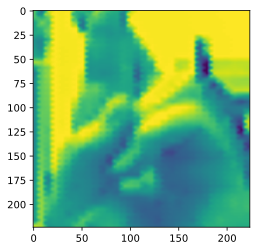

In [ ]:
_ = plt.imshow(np.asarray(X[1][0]))

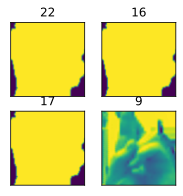

In [ ]:
_ = d2l.show_images(X.reshape(8*3, 224, 224), 2, 2, titles = [str(int(lab)) for lab in y])

# Model Implementation: AlexNet

- **Why AlexNet?**

The decision of using this method came out from the dataset's size that I've decided to use for developing this project:

My dataset is pretty large, and AlexNet uses more convolutional layers comparing it to other models like LeNet, and a larger parameter space to fit the large-scale of a dataset in terms of images.

In fact, by implementing the AlexNet Model, the results improved a lot:

**AlexNet Model Implementation**

In [ ]:
from d2l import torch as d2l
import torch
from torch import nn

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Notes**:
- Use of ReLu
- Use of MaxPooling
- Convolution window size: (11x11)

In [ ]:
net = nn.Sequential(
    # Use of a 11 x 11 window to capture objects.
    # Use of a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output
    # Increase of the number of output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use of three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Below, a large number of outputs of the fully-connected layer.
    # Use the dropout layer to mitigate overfitting:
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer: the number of classes is 24
    nn.Linear(4096, 24))

# Training:

Defining the functions required for **training** and **accuracy evaluation** phases.

Notes:

**slow training** due to:
- a deeper and wider network
- a higher image resolution,
- the more costly convolutions.

Despite this cons of slowness, an improvement of the model's performances on this dataset has been reach thank to the AlexNet method implementation.

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Setting the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    # Number of correct predictions, number of predictions
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            # Required if doing the fine-tuning of BERT (recurrent network)
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

def train(net, train_set, test_set, num_epochs, lr,
              device=d2l.try_gpu()):
    """Train a model with a GPU"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) # Xavier parameter initialization
    net.apply(init_weights)
    print('training on', device)

    net.to(device) # MOVE the net to the GPU
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_set)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train() # Set the network to training mode

        for i, (X, y) in enumerate(train_set):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device) # MOVE each minibatch of data to the GPU
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad(): # detach gradient calculation for avoiding effects on backpropagation calculation
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()

            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_set)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 1.152, train acc 0.646, test acc 0.673
437.6 examples/sec on cuda:0


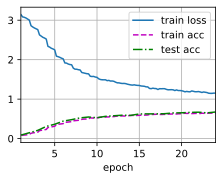

In [ ]:
lr, num_epochs = 0.01, 24
train(net, train_set, test_set, num_epochs, lr, device=d2l.try_gpu())

# What can we say about the graph above?

**Verify the model's accuracy levels:**
- **Train Accuracy** level: 65%
- **Test Accuracy** level: 66,2%

Even though the model's performances don't reach the 100% of accuracy, the model has improved a lot from the beginning of my project which started with vary bad results.

A fondamental aspect that results from the graph is that Train and Test Accuracy are very close to each other, so it doesn't seem returning overfitting or underfitting cases over my data.

**What about the train loss?**

In terms of performances the train loss is still quite high, mostly in the initial state of the training; however, it seems having a good tendency since it continuosly decrease during the training phase.
Due to this tendency, I can expect that, by increasing even more the number of epochs, the train loss will decrease as well becoming very small.

# Some final comments about my project:

The choice of implementing AlexNet Model and the performances improvement as well, turn out after many steps:
- Implementation of different kind of models as LeNet, GoogleNet and ResNet
- Initial use of a sample of my data, then increased it time by time deciding to finally use the whole data available
- Increase of the number of layers in order to improve the model's ability to learn the dataset's features more deeply.
- Increase of number of epochs

And after all these tries I've verified that, considering my datataset, it was the best way to front the development.

**Note**: compressed dataset file couldn't be attached due to its size.